In [77]:
import pandas as pd
from scipy.optimize import linprog
import matplotlib.pyplot as plt

In [78]:
# Load data
df = pd.read_csv("Train.csv")

In [79]:

df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [80]:
# Select top 50 rows for optimization
df_lp = df.head(50).copy()

In [81]:
# Objective function: minimize cost + discount
c = df_lp["Cost_of_the_Product"].values + df_lp["Discount_offered"].values

In [82]:
# Constraints:
A = [
    df_lp["Weight_in_gms"].values,          # total weight constraint
    df_lp["Discount_offered"].values        # total discount constraint
]
b = [100000, 2500]  # total weight <= 100000 grams, total discount <= 2500


In [83]:
# Bounds (each shipment can be selected between 0 and 1 times — fractional)
x_bounds = [(0, 1) for _ in range(len(df_lp))]

In [84]:
# Run optimization
res = linprog(c=c, A_ub=A, b_ub=b, bounds=x_bounds, method="highs")

In [85]:
# Add results
df_lp["Selected_Fraction"] = res.x

In [87]:
# Filter selected shipments
selected = df_lp[df_lp["Selected_Fraction"] > 0.01]

### Plot Cost Comparison

In [89]:
# Cost calculations
original_cost = df_lp["Cost_of_the_Product"].sum() + df_lp["Discount_offered"].sum()

In [90]:
optimized_cost = sum((selected["Cost_of_the_Product"] + selected["Discount_offered"]) * selected["Selected_Fraction"])

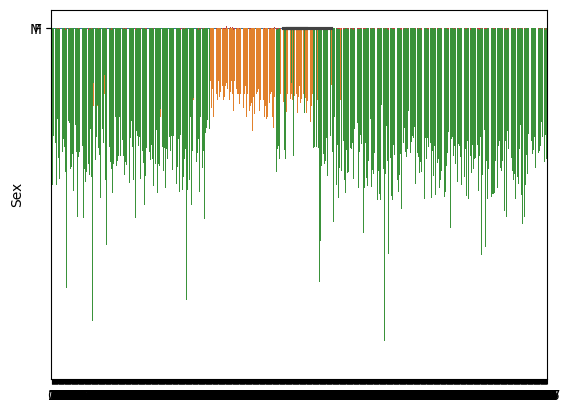

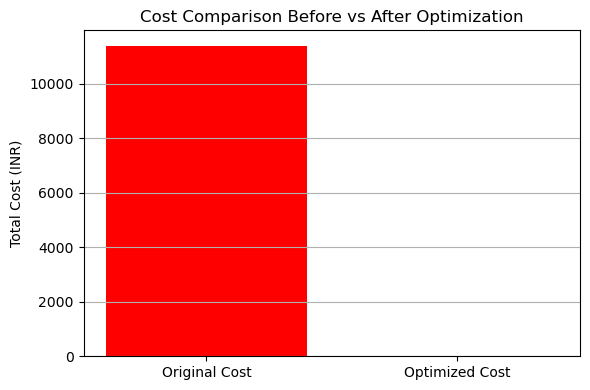

In [91]:
# Plot
plt.figure(figsize=(6,4))
plt.bar(["Original Cost", "Optimized Cost"], [original_cost, optimized_cost], color=["red", "green"])
plt.ylabel("Total Cost (INR)")
plt.title("Cost Comparison Before vs After Optimization")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [92]:
# Summary table
selected[["ID", "Cost_of_the_Product", "Discount_offered", "Weight_in_gms", "Selected_Fraction"]]

,ID,Cost_of_the_Product,Discount_offered,Weight_in_gms,Selected_Fraction
